In [1]:
# Libraries used
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.stats import chi2_contingency

In [2]:
# Importing csv

df = pd.read_csv("eurocup.csv", encoding='latin1')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# some of them are in capital letters, just a little fix
df.columns = df.columns.str.lower()

df.head()

,unnamed: 0,type,numberofplay,codeteam,player_id,playtype,player,team,dorsal,minute,markertime,points_a,points_b,comment,playinfo,teama,teamb,gamenumber,year
0,1,0,2,JER,P002067,2FGA,"KOKIA, URI",Hapoel Migdal Jerusalem,6.0,1,09:34,NaN,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Migdal Jerusalem,1,2012
1,2,0,3,RUD,P002012,D,"ORELIK, GEDIMINAS",BC Prienai,12.0,1,09:29,NaN,NaN,NaN,Def Rebound (1),BC Prienai,Hapoel Migdal Jerusalem,1,2012
2,3,0,4,JER,P004235,CM,"SMITH, CRAIG",Hapoel Migdal Jerusalem,8.0,1,09:19,NaN,NaN,NaN,Foul (1),BC Prienai,Hapoel Migdal Jerusalem,1,2012
3,4,0,5,RUD,P002012,RV,"ORELIK, GEDIMINAS",BC Prienai,12.0,1,09:19,NaN,NaN,NaN,Foul Drawn (1),BC Prienai,Hapoel Migdal Jerusalem,1,2012
4,5,0,6,RUD,PLCW,2FGA,"JANAVICIUS, ZYGIMANTAS",BC Prienai,4.0,1,09:06,NaN,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Migdal Jerusalem,1,2012


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933208 entries, 0 to 933207
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unnamed: 0    933208 non-null  int64  
 1   type          933208 non-null  int64  
 2   numberofplay  933208 non-null  int64  
 3   codeteam      933208 non-null  object 
 4   player_id     933208 non-null  object 
 5   playtype      933206 non-null  object 
 6   player        895370 non-null  object 
 7   team          921755 non-null  object 
 8   dorsal        894463 non-null  float64
 9   minute        933208 non-null  int64  
 10  markertime    921819 non-null  object 
 11  points_a      151471 non-null  float64
 12  points_b      151159 non-null  float64
 13  comment       0 non-null       float64
 14  playinfo      932403 non-null  object 
 15  teama         933208 non-null  object 
 16  teamb         933208 non-null  object 
 17  gamenumber    933208 non-null  int64  
 18  year

In [4]:
# Found some of the inputs with blank spaces at the end
df["playtype"] = df["playtype"].str.strip()

df["playtype"].unique()

array(['2FGA', 'D', 'CM', 'RV', 'O', 'TO', '3FGM', 'ST', 'LAYUPMD', 'AS',
       '2FGM', 'TOUT', 'TOUT_TV', '3FGA', 'IN', 'OUT', 'LAYUPATT', 'FTM',
       '3FGAB', 'AG', 'FV', 'EP', 'FTA', 'OF', 'DUNK', '2FGAB', 'CMT',
       'CMU', 'EG', 'BP', 'TPOFF', 'JB', nan, 'C', 'B', 'CMD', 'F'],
      dtype=object)

In [5]:
# Assuming df is your DataFrame
# Add a new column for the next action after "O"
df['next_action_after_O'] = df['playtype'].shift(-1).where(df['playtype'] == 'O')

# Fill the column with blank if the condition is not met
df['next_action_after_O'] = df['next_action_after_O'].fillna('')


In [6]:
df.head()

,unnamed: 0,type,numberofplay,codeteam,player_id,playtype,player,team,dorsal,minute,markertime,points_a,points_b,comment,playinfo,teama,teamb,gamenumber,year,next_action_after_O
0,1,0,2,JER,P002067,2FGA,"KOKIA, URI",Hapoel Migdal Jerusalem,6.0,1,09:34,NaN,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Migdal Jerusalem,1,2012,
1,2,0,3,RUD,P002012,D,"ORELIK, GEDIMINAS",BC Prienai,12.0,1,09:29,NaN,NaN,NaN,Def Rebound (1),BC Prienai,Hapoel Migdal Jerusalem,1,2012,
2,3,0,4,JER,P004235,CM,"SMITH, CRAIG",Hapoel Migdal Jerusalem,8.0,1,09:19,NaN,NaN,NaN,Foul (1),BC Prienai,Hapoel Migdal Jerusalem,1,2012,
3,4,0,5,RUD,P002012,RV,"ORELIK, GEDIMINAS",BC Prienai,12.0,1,09:19,NaN,NaN,NaN,Foul Drawn (1),BC Prienai,Hapoel Migdal Jerusalem,1,2012,
4,5,0,6,RUD,PLCW,2FGA,"JANAVICIUS, ZYGIMANTAS",BC Prienai,4.0,1,09:06,NaN,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Migdal Jerusalem,1,2012,


In [7]:
# Found some of the inputs with blank spaces at the end
df['next_action_after_O'] = df['next_action_after_O'].str.strip()

df['next_action_after_O'].unique()

array(['', 'TO', '2FGM', 'CM', 'LAYUPMD', '3FGA', 'IN', '2FGA',
       'LAYUPATT', '3FGM', 'O', 'D', 'OUT', '2FGAB', 'AS', 'ST', 'RV',
       'FV', 'AG', 'OF', 'EP', 'DUNK', 'CMT', '3FGAB', 'FTM', 'EG', 'FTA',
       'TOUT', 'CMU', 'BP', 'C', 'B'], dtype=object)

In [8]:
# Replace 'DUNK' and 'LAYUPMD' with '2FGM'
df['next_action_after_O'] = df['next_action_after_O'].replace(['DUNK', 'LAYUPMD'], '2FGM')

# Replace 'LAYUPATT' and '2FGAG' with '2FGA'
df['next_action_after_O'] = df['next_action_after_O'].replace(['LAYUPATT', '2FGAB'], '2FGA')

df['next_action_after_O'] = df['next_action_after_O'].replace(['3FGAB'], '3FGA')

df['next_action_after_O'].value_counts()

next_action_after_O
        896914
2FGM     10528
2FGA      7613
CM        4720
3FGA      3666
TO        3229
3FGM      2030
RV        1877
IN        1233
AS         280
OUT        250
TOUT       195
FV         134
EP         129
O           92
OF          65
EG          61
CMU         50
D           35
ST          23
AG          23
FTM         22
CMT         20
FTA          9
C            4
BP           3
B            3
Name: count, dtype: int64

In [9]:
df["teamb"].unique()

array(['Hapoel Migdal Jerusalem', 'Artland Dragons Quakenbrueck',
       'Strasbourg', 'EWE Baskets Oldenburg ', 'Fiat Turin',
       'MoraBanc Andorra', 'Promitheas Patras', 'BC Budivelnik Kiev',
       'CEZ Basketball Nymburk', 'Paris Levallois', 'JSF Nanterre',
       'Cedevita Zagreb', 'UNICS Kazan', 'AS Monaco',
       'Belgacom Spirou Basket', 'Le Mans Sarthe Basket',
       'Brose Baskets Bamberg', 'Dolomiti Energia Trento',
       'MZT Skopje Aerodrom', 'Darussafaka Istanbul', 'ratiopharm Ulm',
       'Segafredo Virtus Bologna', 'KK Buducnost VOLI', 'Telenet Ostend',
       'Alba Berlin', 'Montakit Fuenlabrada', 'Grissin Bon Reggio Emilia',
       'Partizan NIS Belgrade', 'VEF Riga', 'Elan Chalon sur Saone',
       'Foxtown Cantu', 'Enel Basket Brindisi', 'Lietuvos Rytas Vilnius',
       'FC Bayern Munich', 'Tofas Bursa', 'Limoges CSP',
       'BC Triumph Lyubertsy', 'Dinamo Banco di Sardegna Sassari',
       'ASVEL Lyon Villeurbanne', 'Herbalife Gran Canaria Las Palmas',
     

In [10]:
#  Some of the team males were similar due to sponsor or typo mistakes, changed it
df['teama'] = df['teama'].replace({
    'Hapoel Migdal Jerusalem': 'Hapoel Jerusalem',
    'Hapoel Bank Yahav Jerusalem': 'Hapoel Jerusalem',
    'Artland Dragons Quakenbrueck': 'Artland Dragons',
    'EWE Baskets Oldenburg ': 'EWE Baskets Oldenburg',
    'Fiat Turin': 'Fiat Torino',
    'Buducnost VOLI Podgorica': 'Buducnost VOLI',
    'KK Buducnost VOLI': 'Buducnost VOLI',
    'Buducnost Voli Podgorica': 'Buducnost VOLI',
    'Galatasaray Odeabank Istanbul': 'Galatasaray Istanbul',
    'Galatasaray Doga Sigorta Istanbul': 'Galatasaray Istanbul',
    'Galatasaray Medical Park': 'Galatasaray Istanbul',
    'Herbalife Gran Canaria Las Palmas': 'Herbalife Gran Canaria',
    'Valencia Basket Club': 'Valencia Basket',
    'Lietuvos Rytas Vilnius': 'Rytas Vilnius',
    'BC Triumph Lyubertsy': 'BC Khimki Moscow Region',
    'PBC Lokomotiv Kuban': 'Lokomotiv Kuban Krasnodar',
    'Asvel Villeurbanne Lyon': 'ASVEL Villeurbanne',
    'ASVEL Lyon Villeurbanne': 'ASVEL Villeurbanne',
    'Belgacom Spirou Basket': 'Proximus Spirou Charleroi',
    'Belgacom Spirou Charleroi': 'Proximus Spirou Charleroi',
    'Crvena Zvezda Diva Belgrade': 'Crvena Zvezda mts Belgrade',
    'Crvena Zvezda Telekom Belgrade': 'Crvena Zvezda mts Belgrade',
    'Crvena Zvezda': 'Crvena Zvezda mts Belgrade'
})
df['teamb'] = df['teamb'].replace({
    'Hapoel Migdal Jerusalem': 'Hapoel Jerusalem',
    'Hapoel Bank Yahav Jerusalem': 'Hapoel Jerusalem',
    'Artland Dragons Quakenbrueck': 'Artland Dragons',
    'EWE Baskets Oldenburg ': 'EWE Baskets Oldenburg',
    'Fiat Turin': 'Fiat Torino',
    'Buducnost VOLI Podgorica': 'Buducnost VOLI',
    'KK Buducnost VOLI': 'Buducnost VOLI',
    'Buducnost Voli Podgorica': 'Buducnost VOLI',
    'Galatasaray Odeabank Istanbul': 'Galatasaray Istanbul',
    'Galatasaray Doga Sigorta Istanbul': 'Galatasaray Istanbul',
    'Galatasaray Medical Park': 'Galatasaray Istanbul',
    'Herbalife Gran Canaria Las Palmas': 'Herbalife Gran Canaria',
    'Valencia Basket Club': 'Valencia Basket',
    'Lietuvos Rytas Vilnius': 'Rytas Vilnius',
    'BC Triumph Lyubertsy': 'BC Khimki Moscow Region',
    'PBC Lokomotiv Kuban': 'Lokomotiv Kuban Krasnodar',
    'Asvel Villeurbanne Lyon': 'ASVEL Villeurbanne',
    'ASVEL Lyon Villeurbanne': 'ASVEL Villeurbanne',
    'Belgacom Spirou Basket': 'Proximus Spirou Charleroi',
    'Belgacom Spirou Charleroi': 'Proximus Spirou Charleroi',
    'Crvena Zvezda Diva Belgrade': 'Crvena Zvezda mts Belgrade',
    'Crvena Zvezda Telekom Belgrade': 'Crvena Zvezda mts Belgrade',
    'Crvena Zvezda': 'Crvena Zvezda mts Belgrade'
})

df['team'] = df['team'].replace({
    'Hapoel Migdal Jerusalem': 'Hapoel Jerusalem',
    'Hapoel Bank Yahav Jerusalem': 'Hapoel Jerusalem',
    'Artland Dragons Quakenbrueck': 'Artland Dragons',
    'EWE Baskets Oldenburg ': 'EWE Baskets Oldenburg',
    'Fiat Turin': 'Fiat Torino',
    'Buducnost VOLI Podgorica': 'Buducnost VOLI',
    'KK Buducnost VOLI': 'Buducnost VOLI',
    'Buducnost Voli Podgorica': 'Buducnost VOLI',
    'Galatasaray Odeabank Istanbul': 'Galatasaray Istanbul',
    'Galatasaray Doga Sigorta Istanbul': 'Galatasaray Istanbul',
    'Galatasaray Medical Park': 'Galatasaray Istanbul',
    'Herbalife Gran Canaria Las Palmas': 'Herbalife Gran Canaria',
    'Valencia Basket Club': 'Valencia Basket',
    'Lietuvos Rytas Vilnius': 'Rytas Vilnius',
    'BC Triumph Lyubertsy': 'BC Khimki Moscow Region',
    'PBC Lokomotiv Kuban': 'Lokomotiv Kuban Krasnodar',
    'Asvel Villeurbanne Lyon': 'ASVEL Villeurbanne',
    'ASVEL Lyon Villeurbanne': 'ASVEL Villeurbanne',
    'Belgacom Spirou Basket': 'Proximus Spirou Charleroi',
    'Belgacom Spirou Charleroi': 'Proximus Spirou Charleroi',
    'Crvena Zvezda Diva Belgrade': 'Crvena Zvezda mts Belgrade',
    'Crvena Zvezda Telekom Belgrade': 'Crvena Zvezda mts Belgrade',
    'Crvena Zvezda': 'Crvena Zvezda mts Belgrade'
})



In [11]:
# It happened that some "gamenumber" happened to have the same, I'll give them unique values for each game
df['unique_game_id'] = df['year'].astype(str) + '_' + df['gamenumber'].astype(str)
df.head()


,unnamed: 0,type,numberofplay,codeteam,player_id,playtype,player,team,dorsal,minute,markertime,points_a,points_b,comment,playinfo,teama,teamb,gamenumber,year,next_action_after_O,unique_game_id
0,1,0,2,JER,P002067,2FGA,"KOKIA, URI",Hapoel Jerusalem,6.0,1,09:34,NaN,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,1,2012,,2012_1
1,2,0,3,RUD,P002012,D,"ORELIK, GEDIMINAS",BC Prienai,12.0,1,09:29,NaN,NaN,NaN,Def Rebound (1),BC Prienai,Hapoel Jerusalem,1,2012,,2012_1
2,3,0,4,JER,P004235,CM,"SMITH, CRAIG",Hapoel Jerusalem,8.0,1,09:19,NaN,NaN,NaN,Foul (1),BC Prienai,Hapoel Jerusalem,1,2012,,2012_1
3,4,0,5,RUD,P002012,RV,"ORELIK, GEDIMINAS",BC Prienai,12.0,1,09:19,NaN,NaN,NaN,Foul Drawn (1),BC Prienai,Hapoel Jerusalem,1,2012,,2012_1
4,5,0,6,RUD,PLCW,2FGA,"JANAVICIUS, ZYGIMANTAS",BC Prienai,4.0,1,09:06,NaN,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,1,2012,,2012_1


In [12]:
# Filter rows where 'next_action_after_O' has a valid value
filtered_df = df[df['next_action_after_O'].str.strip() != '']

In [13]:
# Check basic information
print(filtered_df['next_action_after_O'].describe())

# Count occurrences of each unique action
action_counts = filtered_df['next_action_after_O'].value_counts()
print(action_counts)


count     36294
unique       26
top        2FGM
freq      10528
Name: next_action_after_O, dtype: object
next_action_after_O
2FGM    10528
2FGA     7613
CM       4720
3FGA     3666
TO       3229
3FGM     2030
RV       1877
IN       1233
AS        280
OUT       250
TOUT      195
FV        134
EP        129
O          92
OF         65
EG         61
CMU        50
D          35
ST         23
AG         23
FTM        22
CMT        20
FTA         9
C           4
BP          3
B           3
Name: count, dtype: int64


In [14]:
action_proportions = action_counts / len(filtered_df)
print(action_proportions)

next_action_after_O
2FGM    0.290075
2FGA    0.209759
CM      0.130049
3FGA    0.101008
TO      0.088968
3FGM    0.055932
RV      0.051717
IN      0.033973
AS      0.007715
OUT     0.006888
TOUT    0.005373
FV      0.003692
EP      0.003554
O       0.002535
OF      0.001791
EG      0.001681
CMU     0.001378
D       0.000964
ST      0.000634
AG      0.000634
FTM     0.000606
CMT     0.000551
FTA     0.000248
C       0.000110
BP      0.000083
B       0.000083
Name: count, dtype: float64


In [15]:
# Define the list of actions to consider
valid_actions = ['2FGM', '2FGA', 'CM', '3FGA', '3FGM', 'TO']

# Filter rows with specific values in 'next_action_after_O'
filtered_df = df[df['next_action_after_O'].isin(valid_actions)]

In [16]:
# Check basic information
print(filtered_df['next_action_after_O'].describe())

# Count occurrences of each action
action_counts = filtered_df['next_action_after_O'].value_counts()
print(action_counts)

count     31786
unique        6
top        2FGM
freq      10528
Name: next_action_after_O, dtype: object
next_action_after_O
2FGM    10528
2FGA     7613
CM       4720
3FGA     3666
TO       3229
3FGM     2030
Name: count, dtype: int64


C:\Users\masii\AppData\Local\Temp\ipykernel_18044\2560887660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette="viridis")


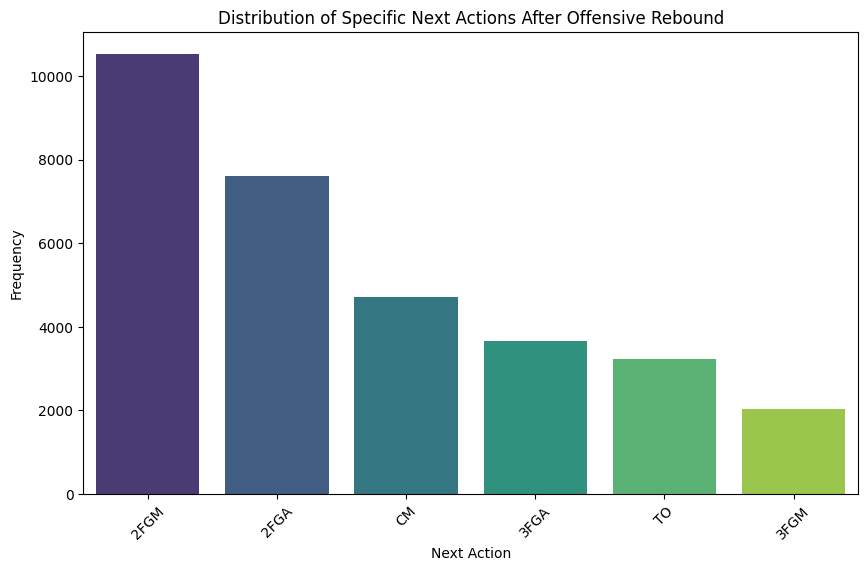

In [17]:
# Bar plot of the specific actions
plt.figure(figsize=(10, 6))
sns.barplot(x=action_counts.index, y=action_counts.values, palette="viridis")
plt.title("Distribution of Specific Next Actions After Offensive Rebound")
plt.xlabel("Next Action")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [18]:
action_proportions = action_counts / len(filtered_df)
print(action_proportions)

next_action_after_O
2FGM    0.331215
2FGA    0.239508
CM      0.148493
3FGA    0.115334
TO      0.101586
3FGM    0.063865
Name: count, dtype: float64


In [19]:
from scipy.stats import chi2_contingency

# Observed frequencies
observed = action_counts.values

# Perform Chi-Square Goodness of Fit Test
chi2, p, dof, expected = chi2_contingency([observed])
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

# Interpretation
if p < 0.05:
    print("The proportions of specific next actions are not evenly distributed.")
else:
    print("No significant difference in the proportions of specific next actions.")

Chi-Square Statistic: 0.0, p-value: 1.0
No significant difference in the proportions of specific next actions.


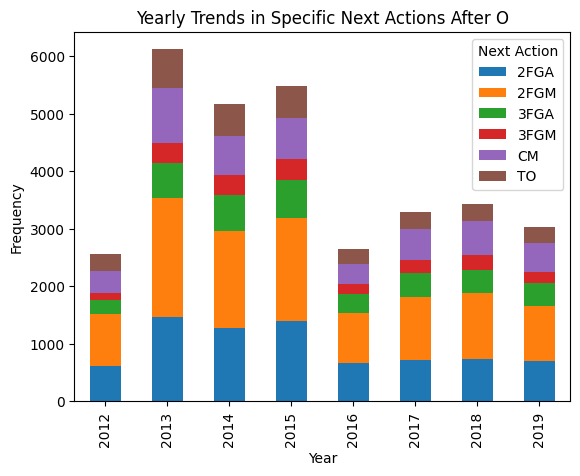

next_action_after_O   2FGA   2FGM   3FGA  3FGM     CM     TO
codeteam                                                    
AEK                   32.0   30.0    9.0   3.0   21.0    6.0
ALE                   28.0   22.0    9.0   3.0   13.0    5.0
ANR                   90.0  118.0   57.0  36.0   93.0   44.0
ARI                   31.0   50.0   17.0  10.0   17.0   13.0
ART                   34.0   63.0   20.0  14.0   35.0   22.0
ASV                  143.0  145.0   51.0  27.0   73.0   44.0
AYK                   48.0   54.0   16.0  10.0   28.0   14.0
AZO                   21.0   24.0    7.0   2.0    7.0    7.0
BAM                   41.0   52.0   20.0  16.0   18.0   26.0
BAN                  141.0  234.0   56.0  38.0  105.0   65.0
BDS                   25.0   20.0    7.0   6.0   10.0    6.0
BER                  218.0  288.0   95.0  57.0  167.0  103.0
BES                   84.0  110.0   43.0  35.0   66.0   47.0
BIL                  123.0  179.0   65.0  38.0   74.0   56.0
BON                   66

In [20]:
# Temporal Trends
filtered_df.groupby('year')['next_action_after_O'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title("Yearly Trends in Specific Next Actions After O")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(title="Next Action")
plt.show()

# Team Analysis
team_action_counts = filtered_df.groupby('codeteam')['next_action_after_O'].value_counts().unstack()
print(team_action_counts)

In [21]:
# Detect the final points for each game
# Group by 'unique_game_id' and forward fill points_a and points_b within each game
df[['points_a', 'points_b']] = (
    df.groupby('unique_game_id')[['points_a', 'points_b']]
    .ffill()  # Forward fill the points to propagate the latest scores
)

# Update the final scores only in rows where 'playtype' is "EG"
df.loc[df['playtype'] == 'EG', ['points_a', 'points_b']] = (
    df.groupby('unique_game_id')[['points_a', 'points_b']].transform('last')
)
df = df.drop(columns=['type', 'dorsal', 'comment', 'gamenumber', 'year'])

df.head()

,unnamed: 0,numberofplay,codeteam,player_id,playtype,player,team,minute,markertime,points_a,points_b,playinfo,teama,teamb,next_action_after_O,unique_game_id
0,1,2,JER,P002067,2FGA,"KOKIA, URI",Hapoel Jerusalem,1,09:34,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,,2012_1
1,2,3,RUD,P002012,D,"ORELIK, GEDIMINAS",BC Prienai,1,09:29,NaN,NaN,Def Rebound (1),BC Prienai,Hapoel Jerusalem,,2012_1
2,3,4,JER,P004235,CM,"SMITH, CRAIG",Hapoel Jerusalem,1,09:19,NaN,NaN,Foul (1),BC Prienai,Hapoel Jerusalem,,2012_1
3,4,5,RUD,P002012,RV,"ORELIK, GEDIMINAS",BC Prienai,1,09:19,NaN,NaN,Foul Drawn (1),BC Prienai,Hapoel Jerusalem,,2012_1
4,5,6,RUD,PLCW,2FGA,"JANAVICIUS, ZYGIMANTAS",BC Prienai,1,09:06,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,,2012_1


In [22]:
# I had problem with the empty spaces in the column, replaced it with nans
df['next_action_after_O'] = df['next_action_after_O'].replace('', np.nan)

In [23]:
# Define the valid actions and other actions
valid_actions = ['2FGM', '2FGA', 'CM', '3FGA', '3FGM', 'TO']
other_actions = ['IN', 'D', 'OUT', 'AS', 'ST', 'RV', 'FV', 'AG', 'OF', 'EP', 'CMT', 'FTM', 'EG', 'FTA', 'TOUT', 'CMU', 'BP', 'C', 'B']

# Filter the DataFrame to include only valid actions after offensive rebounds
df['points_scored'] = df['next_action_after_O'].map({
    '2FGM': 2,
    '3FGM': 3
}).fillna(0)

# Aggregate data for each game
result = (
    df.groupby('unique_game_id')
    .apply(lambda game: pd.Series({
        'teama': game['teama'].iloc[0],
        'teamb': game['teamb'].iloc[0],
        'points_a': game.loc[game['numberofplay'].idxmax(), 'points_a'],
        'points_b': game.loc[game['numberofplay'].idxmax(), 'points_b'],
        'points_a_after_O': game.loc[game['team'] == game['teama'], 'points_scored'].sum(),
        'points_b_after_O': game.loc[game['team'] == game['teamb'], 'points_scored'].sum(),
        **{f'{action}_a': game.loc[(game['team'] == game['teama']) & (game['next_action_after_O'] == action)].shape[0] for action in valid_actions},
        **{f'{action}_b': game.loc[(game['team'] == game['teamb']) & (game['next_action_after_O'] == action)].shape[0] for action in valid_actions},
        'else_a': game.loc[(game['team'] == game['teama']) & (game['next_action_after_O'].isin(other_actions))].shape[0],
        'else_b': game.loc[(game['team'] == game['teamb']) & (game['next_action_after_O'].isin(other_actions))].shape[0],
    }))
    .reset_index()
)

# Calculate proportions
result['proportion_a_points_after_O'] = result['points_a_after_O'] / result['points_a']
result['proportion_b_points_after_O'] = result['points_b_after_O'] / result['points_b']

result.head()


C:\Users\masii\AppData\Local\Temp\ipykernel_18044\2451142216.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda game: pd.Series({


,unique_game_id,teama,teamb,points_a,points_b,points_a_after_O,points_b_after_O,2FGM_a,2FGA_a,CM_a,3FGA_a,3FGM_a,TO_a,2FGM_b,2FGA_b,CM_b,3FGA_b,3FGM_b,TO_b,else_a,else_b,proportion_a_points_after_O,proportion_b_points_after_O
0,2012_1,BC Prienai,Hapoel Jerusalem,85.0,72.0,8.0,0.0,4,0,2,0,0,3,0,0,1,1,0,0,0,0,0.094118,0.000000
1,2012_10,Trefl Sopot,Galatasaray Istanbul,65.0,94.0,6.0,6.0,3,1,4,1,0,2,3,2,1,1,0,0,2,1,0.092308,0.063830
2,2012_100,Valencia Basket,VEF Riga,86.0,82.0,5.0,8.0,1,1,0,1,1,2,4,1,0,0,0,3,2,0,0.058140,0.097561
3,2012_101,Stelmet Zielona Gora,Cajasol Seville,76.0,67.0,0.0,4.0,0,1,1,2,0,2,2,1,3,1,0,0,0,1,0.000000,0.059701
4,2012_102,Spartak St. Petersburg,PBC Lokomotiv Kuban Krasnodar,70.0,84.0,12.0,5.0,6,1,0,1,0,0,1,1,1,1,1,0,0,0,0.171429,0.059524


In [24]:
df.head(500)

,unnamed: 0,numberofplay,codeteam,player_id,playtype,player,team,minute,markertime,points_a,points_b,playinfo,teama,teamb,next_action_after_O,unique_game_id,points_scored
0,1,2,JER,P002067,2FGA,"KOKIA, URI",Hapoel Jerusalem,1,09:34,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0
1,2,3,RUD,P002012,D,"ORELIK, GEDIMINAS",BC Prienai,1,09:29,NaN,NaN,Def Rebound (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0
2,3,4,JER,P004235,CM,"SMITH, CRAIG",Hapoel Jerusalem,1,09:19,NaN,NaN,Foul (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0
3,4,5,RUD,P002012,RV,"ORELIK, GEDIMINAS",BC Prienai,1,09:19,NaN,NaN,Foul Drawn (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0
4,5,6,RUD,PLCW,2FGA,"JANAVICIUS, ZYGIMANTAS",BC Prienai,1,09:06,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0
5,6,7,RUD,P004364,O,"VALEIKA, ARTURAS",BC Prienai,1,09:01,NaN,NaN,Off Rebound (1),BC Prienai,Hapoel Jerusalem,TO,2012_1,0.0
6,7,9,RUD,PLCW,TO,"JANAVICIUS, ZYGIMANTAS",BC Prienai,2,08:56,NaN,NaN,Turnover (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0
7,8,10,JER,P004355,3FGM,"PULLEN, JACOB",Hapoel Jerusalem,2,08:46,NaN,3.0,Three Pointer (1/1 - 3 pt),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0
8,9,11,RUD,PLXL,2FGA,"VENE, SIIM-SANDER",BC Prienai,2,08:29,NaN,3.0,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0
9,10,12,RUD,PLXL,O,"VENE, SIIM-SANDER",BC Prienai,2,08:27,NaN,3.0,Off Rebound (1),BC Prienai,Hapoel Jerusalem,TO,2012_1,0.0


In [25]:
# Had a really wrong aproach, I deleted the ML model I developed because it was based on the prediciton of the points scored after offensive rebounds, and certainly if I already give the model the
# field goals scored, the model is going to be perfect, as it knows exactly given that data
# I will aproach now the "clutch" on offensive rebounds effect, without giving the information of the field goals scored, just the ammount of OFF REB taken every quarter and in the final 5 minuts of the game (and or overtime) 
# when the score is +/- 6 for either team and check the chances to win the game based on that.

# Function to filter for quarters (df did not have the quarters column, it might be easier with smaller numbers rather than minutes)
def assign_quarter(minute):
    """Assign the quarter based on the minute of the game."""
    if minute > 0:
        return (minute - 1) // 10 + 1  # Calculates quarter dynamically
    return None  # Handles invalid or missing minutes

df['quarter'] = df['minute'].apply(assign_quarter)

# Function to detect if the game is in a "clutch" situation
def is_clutch(row):
    """
    Determine if the current row represents a clutch moment.
    Clutch is defined as:
    - Final 6 minutes of the 4th quarter or overtime (minute > 34).
    - Score difference between the teams is 6 or less.
    """
    return int(row['minute'] > 34 and row['quarter'] in [4, 5] and abs(row['points_a'] - row['points_b']) <= 6)

df['clutch'] = df.apply(is_clutch, axis=1)

# Function to propagate clutch status throughout the end of the game
def propagate_clutch(df):
    """
    Propagates the clutch status from the first occurrence to the end of the game
    for each unique game.
    """
    # Group by game and cumulatively propagate clutch status
    df['clutch'] = df.groupby('unique_game_id')['clutch'].transform(lambda x: x.cumsum().clip(upper=1))
    return df

df = propagate_clutch(df)
df.head()

,unnamed: 0,numberofplay,codeteam,player_id,playtype,player,team,minute,markertime,points_a,points_b,playinfo,teama,teamb,next_action_after_O,unique_game_id,points_scored,quarter,clutch
0,1,2,JER,P002067,2FGA,"KOKIA, URI",Hapoel Jerusalem,1,09:34,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0
1,2,3,RUD,P002012,D,"ORELIK, GEDIMINAS",BC Prienai,1,09:29,NaN,NaN,Def Rebound (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0
2,3,4,JER,P004235,CM,"SMITH, CRAIG",Hapoel Jerusalem,1,09:19,NaN,NaN,Foul (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0
3,4,5,RUD,P002012,RV,"ORELIK, GEDIMINAS",BC Prienai,1,09:19,NaN,NaN,Foul Drawn (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0
4,5,6,RUD,PLCW,2FGA,"JANAVICIUS, ZYGIMANTAS",BC Prienai,1,09:06,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0


In [26]:
def calculate_a_wins(row):
    if row['points_a'] > row['points_b']:
        return 1
    else:
        return 0

# Filter where playtype is EG
filtered_df = df[df['playtype'] == 'EG']

# Apply the function to the filtered DataFrame
filtered_df['a_wins'] = filtered_df.apply(calculate_a_wins, axis=1)

# Merge the new column back to the original DataFrame
df = df.merge(filtered_df[['unique_game_id', 'a_wins']], on='unique_game_id', how='left')

# Fill NaN values with 0 (for rows where playtype != 'EG')
df['a_wins'] = df['a_wins'].fillna(0)

# Convert 'a_wins' to integer type
df['a_wins'] = df['a_wins'].astype(int)

# Display the first few rows to confirm the new column
df.head()


C:\Users\masii\AppData\Local\Temp\ipykernel_18044\395468259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['a_wins'] = filtered_df.apply(calculate_a_wins, axis=1)


,unnamed: 0,numberofplay,codeteam,player_id,playtype,player,team,minute,markertime,points_a,points_b,playinfo,teama,teamb,next_action_after_O,unique_game_id,points_scored,quarter,clutch,a_wins
0,1,2,JER,P002067,2FGA,"KOKIA, URI",Hapoel Jerusalem,1,09:34,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0,1
1,2,3,RUD,P002012,D,"ORELIK, GEDIMINAS",BC Prienai,1,09:29,NaN,NaN,Def Rebound (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0,1
2,3,4,JER,P004235,CM,"SMITH, CRAIG",Hapoel Jerusalem,1,09:19,NaN,NaN,Foul (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0,1
3,4,5,RUD,P002012,RV,"ORELIK, GEDIMINAS",BC Prienai,1,09:19,NaN,NaN,Foul Drawn (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0,1
4,5,6,RUD,PLCW,2FGA,"JANAVICIUS, ZYGIMANTAS",BC Prienai,1,09:06,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0,1


In [27]:
# So I had now who wins, lets do the +/- to see how it could affect the score:
df['difference'] = df['points_a'] - df['points_b']

In [28]:
df["playtype"].unique()

array(['2FGA', 'D', 'CM', 'RV', 'O', 'TO', '3FGM', 'ST', 'LAYUPMD', 'AS',
       '2FGM', 'TOUT', 'TOUT_TV', '3FGA', 'IN', 'OUT', 'LAYUPATT', 'FTM',
       '3FGAB', 'AG', 'FV', 'EP', 'FTA', 'OF', 'DUNK', '2FGAB', 'CMT',
       'CMU', 'EG', 'BP', 'TPOFF', 'JB', nan, 'C', 'B', 'CMD', 'F'],
      dtype=object)

In [29]:
# In order to make it clear, dunks and layups are also 2fgm as they are scored, changing the names as we do not
# care what type of 2 points are, just if they are.
df['playtype'] = df['playtype'].replace({
    'DUNK': '2FGM',
    'LAYUPMD': '2FGM',
    'LAYUPATT': '2FGA'
})

In [30]:
# This code was a massive headache, I wanted to sum, for each quarter and team the cumulative statistics for the "playtypes", and it works now.
# The problem is that if it happens in q1, it will add values as well to the next quarters. I will not burn my head more, as the statistics are alright for each quarter and the column it belongs.
# I know it will be better if I do it like NaN when it comes to data in columns I do not need, but it takes long to run this code and I feel like wasting time every time I modify something in order to improve the df.

# Define the playtypes and teams
playtypes = ['2FGA', '2FGM', 'D', 'O', '3FGM', '3FGA', 'FTA', 'FTM']
teams = ['a', 'b']
quarters = range(1, 5)

# Map team column names
team_map = {'a': 'teama', 'b': 'teamb'}

# Initialize new columns for each playtype and quarter
quarter_columns = [f'{pt}_q{q}_{team}' for pt in playtypes for q in quarters for team in teams]
clutch_columns = [f'{pt}_clutch_{team}' for pt in playtypes for team in teams]
df = df.assign(**{col: 0 for col in quarter_columns + clutch_columns})

# Calculate cumulative stats for each playtype and team per quarter
for team in teams:
    team_col = team_map[team]
    for pt in playtypes:
        # Cumulative columns for each quarter
        for q in quarters:
            col_name = f'{pt}_q{q}_{team}'
            df[col_name] = 0  # Initialize the column for cumulative sums
            for game_id, group in df.groupby(['unique_game_id', 'quarter']):
                # Only consider data up to and including the current quarter 'q'
                mask = (
                    (group['playtype'] == pt)
                    & (group['team'] == group[team_col])
                    & (group['quarter'] <= q)
                )
                df.loc[group.index, col_name] = mask.cumsum()

        # Cumulative columns for clutch situations per quarter
        clutch_col = f'{pt}_clutch_{team}'
        df[clutch_col] = 0  # Initialize the column for clutch sums
        for game_id, group in df.groupby(['unique_game_id', 'quarter']):
            # Only consider data up to and including the current quarter 'q'
            mask = (
                (group['playtype'] == pt)
                & (group['clutch'] == 1)
                & (group['team'] == group[team_col])
                & (group['quarter'] <= q)
            )
            df.loc[group.index, clutch_col] = mask.cumsum()


In [31]:
df.head()

,unnamed: 0,numberofplay,codeteam,player_id,playtype,player,team,minute,markertime,points_a,points_b,playinfo,teama,teamb,next_action_after_O,unique_game_id,points_scored,quarter,clutch,a_wins,difference,2FGA_q1_a,2FGA_q1_b,2FGA_q2_a,2FGA_q2_b,2FGA_q3_a,2FGA_q3_b,2FGA_q4_a,2FGA_q4_b,2FGM_q1_a,2FGM_q1_b,2FGM_q2_a,2FGM_q2_b,2FGM_q3_a,2FGM_q3_b,2FGM_q4_a,2FGM_q4_b,D_q1_a,D_q1_b,D_q2_a,D_q2_b,D_q3_a,D_q3_b,D_q4_a,D_q4_b,O_q1_a,O_q1_b,O_q2_a,O_q2_b,O_q3_a,O_q3_b,O_q4_a,O_q4_b,3FGM_q1_a,3FGM_q1_b,3FGM_q2_a,3FGM_q2_b,3FGM_q3_a,3FGM_q3_b,3FGM_q4_a,3FGM_q4_b,3FGA_q1_a,3FGA_q1_b,3FGA_q2_a,3FGA_q2_b,3FGA_q3_a,3FGA_q3_b,3FGA_q4_a,3FGA_q4_b,FTA_q1_a,FTA_q1_b,FTA_q2_a,FTA_q2_b,FTA_q3_a,FTA_q3_b,FTA_q4_a,FTA_q4_b,FTM_q1_a,FTM_q1_b,FTM_q2_a,FTM_q2_b,FTM_q3_a,FTM_q3_b,FTM_q4_a,FTM_q4_b,2FGA_clutch_a,2FGA_clutch_b,2FGM_clutch_a,2FGM_clutch_b,D_clutch_a,D_clutch_b,O_clutch_a,O_clutch_b,3FGM_clutch_a,3FGM_clutch_b,3FGA_clutch_a,3FGA_clutch_b,FTA_clutch_a,FTA_clutch_b,FTM_clutch_a,FTM_clutch_b
0,1,2,JER,P002067,2FGA,"KOKIA, URI",Hapoel Jerusalem,1,09:34,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0,1,NaN,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,RUD,P002012,D,"ORELIK, GEDIMINAS",BC Prienai,1,09:29,NaN,NaN,Def Rebound (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0,1,NaN,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,4,JER,P004235,CM,"SMITH, CRAIG",Hapoel Jerusalem,1,09:19,NaN,NaN,Foul (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0,1,NaN,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,5,RUD,P002012,RV,"ORELIK, GEDIMINAS",BC Prienai,1,09:19,NaN,NaN,Foul Drawn (1),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0,1,NaN,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,6,RUD,PLCW,2FGA,"JANAVICIUS, ZYGIMANTAS",BC Prienai,1,09:06,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),BC Prienai,Hapoel Jerusalem,NaN,2012_1,0.0,1,0,1,NaN,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Remove rows where "markertime" is NaN
df = df.dropna(subset=["markertime"])

In [34]:
# So because the last code is a mess, I will create datasets for each quarter and the clutch (and carry on on a new notebook,so I do not need to run all the code again in case I have some problems)

# Columns to keep for each dataset
common_columns = ["numberofplay", "team", "minute", "markertime", "teama", "teamb", "unique_game_id", "quarter", "a_wins", "difference", "points_a", "points_b"]
# dealing with nans from columns diff and points for the ML model
columns_to_fill = ['difference', 'points_a', 'points_b']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

# Create datasets for each quarter
df1 = df[common_columns + [col for col in df.columns if 'q1' in col]]
df2 = df[common_columns + [col for col in df.columns if 'q2' in col]]
df3 = df[common_columns + [col for col in df.columns if 'q3' in col]]
df4 = df[common_columns + [col for col in df.columns if 'q4' in col]]

# Create dataset for clutch situations
dfclutch = df[common_columns + [col for col in df.columns if 'clutch' in col]]

# Optionally, reset index for the new DataFrames
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)
df4.reset_index(drop=True, inplace=True)
dfclutch.reset_index(drop=True, inplace=True)

df1 = df1[df1['quarter'] == 1]
df2 = df2[df2['quarter'] == 2]
df3 = df3[df3['quarter'] == 3]
df4 = df4[df4['quarter'] == 4]
dfclutch = dfclutch[dfclutch["clutch"] == 1]

# Save each DataFrame to a CSV file
df1.to_csv('df1.csv', index=False)
df2.to_csv('df2.csv', index=False)
df3.to_csv('df3.csv', index=False)
df4.to_csv('df4.csv', index=False)
dfclutch.to_csv('dfclutch.csv', index=False)

In [35]:
result.to_csv("stats after off reb.csv", index=False)

In [37]:
# Function to convert markertime to minutes, returning NaN for invalid entries
def convert_to_minutes(time_str):
    try:
        minutes, seconds = map(int, time_str.split(':'))
        return minutes + seconds / 60
    except ValueError:
        return float('nan')

# Apply the function to markertime column
df['markertime_minutes'] = df['markertime'].apply(convert_to_minutes)

# Identify the unique_game_id values to drop
games_to_drop = df[df['markertime_minutes'] > 10.0]['unique_game_id'].unique()

# Drop the games from unique_game_id if any markertime is over 10:00
df = df[~df['unique_game_id'].isin(games_to_drop)]

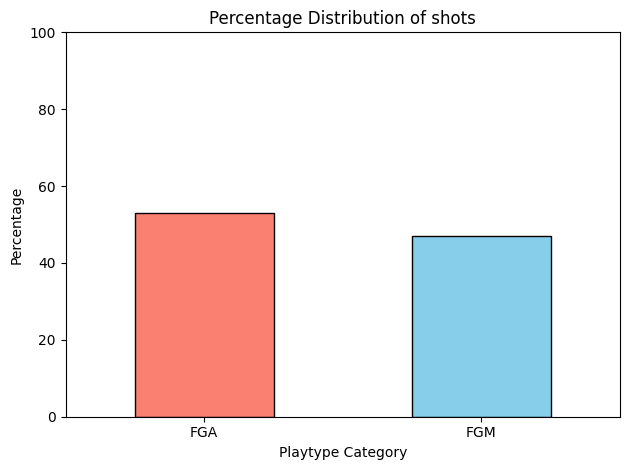

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv("your_data.csv")

# New categories
fga_group = ['2FGA', '3FGA']
fgm_group = ['2FGM', '3FGM']

# Count occurrences for all playtypes
counts = df['playtype'].value_counts()

# Sum counts for each group
fga_sum = counts.loc[fga_group].sum()
fgm_sum = counts.loc[fgm_group].sum()

# Total sum of FGA and FGM
total_sum = fga_sum + fgm_sum

# Calculate percentages
fga_percentage = (fga_sum / total_sum) * 100
fgm_percentage = (fgm_sum / total_sum) * 100

# Data for plotting
data = pd.Series([fga_percentage, fgm_percentage], index=['FGA', 'FGM'])

# Plotting
data.plot(kind='bar', color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Percentage Distribution of shots')
plt.xlabel('Playtype Category')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


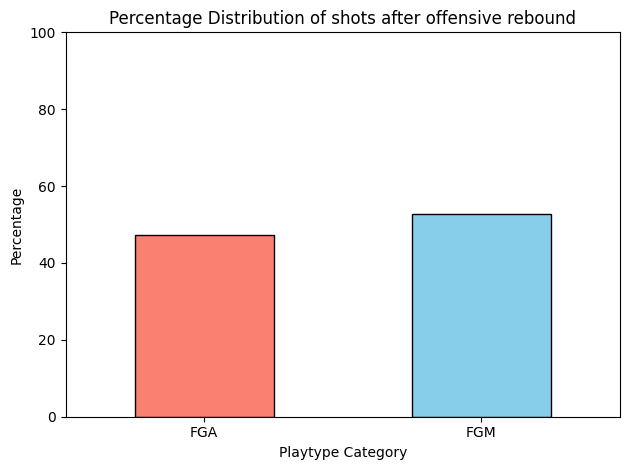

In [52]:
# Columns to be summed
fga_columns = ['2FGA_a', '3FGA_a', '2FGA_b', '3FGA_b']
fgm_columns = ['2FGM_a', '3FGM_a', '2FGM_b', '3FGM_b']

# Sum the values in each group
fga_sum = result[fga_columns].sum().sum()  # Sum all specified FGA columns
fgm_sum = result[fgm_columns].sum().sum()  # Sum all specified FGM columns

# Total sum for normalization
total_sum = fga_sum + fgm_sum

# Calculate percentages
fga_percentage = (fga_sum / total_sum) * 100
fgm_percentage = (fgm_sum / total_sum) * 100

# Data for plotting
data = pd.Series([fga_percentage, fgm_percentage], index=['FGA', 'FGM'])

# Plotting
data.plot(kind='bar', color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Percentage Distribution of shots after offensive rebound')
plt.xlabel('Playtype Category')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

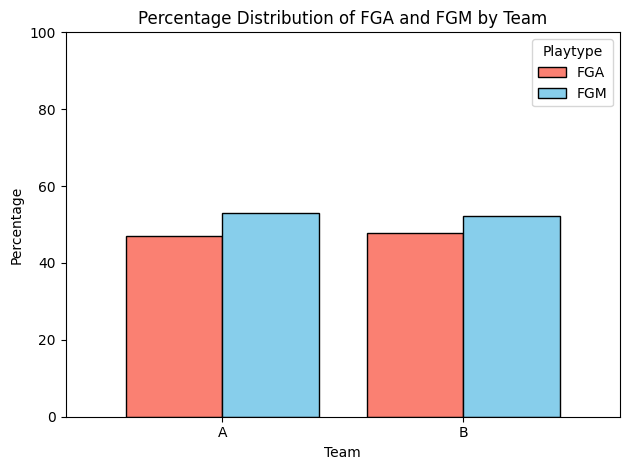

In [69]:
# Columns to be summed
fga_a_columns = ['2FGA_a', '3FGA_a']
fga_b_columns = ['2FGA_b', '3FGA_b']
fgm_a_columns = ['2FGM_a', '3FGM_a']
fgm_b_columns = ['2FGM_b', '3FGM_b']

# Sum the values in each group
fga_a_sum = result[fga_a_columns].sum().sum()
fga_b_sum = result[fga_b_columns].sum().sum()
fgm_a_sum = result[fgm_a_columns].sum().sum()
fgm_b_sum = result[fgm_b_columns].sum().sum()

# Total sum for normalization
total_a_sum = fga_a_sum + fgm_a_sum
total_b_sum = fga_b_sum + fgm_b_sum

# Calculate percentages
fga_a_percentage = (fga_a_sum / total_a_sum) * 100
fgm_a_percentage = (fgm_a_sum / total_a_sum) * 100
fga_b_percentage = (fga_b_sum / total_b_sum) * 100
fgm_b_percentage = (fgm_b_sum / total_b_sum) * 100

# Data for plotting
data = pd.DataFrame({
    'FGA': [fga_a_percentage, fga_b_percentage],
    'FGM': [fgm_a_percentage, fgm_b_percentage]
}, index=['A', 'B'])

# Plotting
data.plot(kind='bar', color=['salmon', 'skyblue'], edgecolor='black', width=0.8)
plt.title('Percentage Distribution of FGA and FGM by Team')
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.legend(title='Playtype', loc='upper right')
plt.tight_layout()
plt.show()
